In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving NetflixOriginals.csv to NetflixOriginals.csv
User uploaded file "NetflixOriginals.csv" with length 38678 bytes


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

scoreDataframe = pd.DataFrame([], columns=[])

def listarGenero():
    
    coluna = "Genre"

    freq = pd.Series(dados[f'{coluna}'].value_counts())
    freq2 = pd.Series(dados[f'{coluna}'].value_counts().index)

    data = np.array(freq)

    DataFrame = {"fi": []}
    DataFrame = pd.DataFrame(DataFrame)
    DataFrame["fi"] = data

    print("{:>3} {} {:>40} {} {:>3} {} {:>3}".format("", " ", "Genre", "|", "fi", "|", "Fi"))
    print("-" * 60)

    i = 0
    y = 0
    for x in DataFrame["fi"]:
        anterior = y
        proximo = x + anterior

        print("{:>3} {} {:>40} {} {:>3} {} {:>3}".format(i, "|", freq2[i], "|", x, "|", proximo))
        y = proximo
        i += 1

def listarNota():

    coluna = "IMDB Score"
    dados.sort_values([f"{coluna}"], inplace=True)  # ORDENANDO A COLUNA
    listaNotasUnique = dados[f"{coluna}"].unique()
    print("-" * 60)

    menorNota = listaNotasUnique.min()
    print("Menor valor: ", menorNota)
    maiorNota = listaNotasUnique.max()
    print("Maior valor: ", maiorNota)

    AmplitudeTotal= maiorNota - menorNota
    print("Amplitude Total: ", AmplitudeTotal)

    n = dados["IMDB Score"].count()
    print("Quantidade de números presentes em IMDB Score: ",n)

    # N é a quantidade total de numeros na coluna
    QuantidadeClasses = 1 + 3.3 * math.log(n, 10) # log de n base 10
    print("Quantidade Classes: ", round(QuantidadeClasses))

    AmplitudeCadaClasse = AmplitudeTotal / QuantidadeClasses
    print("Amplitude de cada Classe: ", AmplitudeCadaClasse)

    print("\nTabela:")

    intervalo = 0
    anteriorIntervalo = 0

    contadorSeries = pd.Series(dados['IMDB Score'].value_counts()).sort_index()

    global scoreDataframe 
    scoreDataframe = pd.DataFrame([], columns=['Intervalo', 'fi', 'Xi', 'Fi'])
   
    Fi = 0

    for x in range(int(QuantidadeClasses)+1):
        if intervalo == 0:
            anteriorIntervalo = contadorSeries.index.tolist()[0]
            intervalo = anteriorIntervalo + AmplitudeCadaClasse

        filmesCount = dados["IMDB Score"].between(anteriorIntervalo, intervalo).sum()

        Fi += filmesCount

        df2 = pd.DataFrame(
            [[f"{round(anteriorIntervalo,2)} |-- {round(intervalo,2)}",
             filmesCount,
             round((intervalo+anteriorIntervalo)/2,3),  
             Fi]],
            columns=['Intervalo', 'fi', 'Xi', 'Fi'])

        scoreDataframe = scoreDataframe.append(df2)
        anteriorIntervalo = intervalo
        intervalo = anteriorIntervalo + AmplitudeCadaClasse

    print(scoreDataframe)

def loadDados():
    try:
        dados = pd.read_csv(f"NetflixOriginals.csv", header=0, encoding="ISO-8859-1",sep=",")
    except:
        print("A base de dados nao pode ser carregada.")
        return

def executar():
    variavel = int(input("\n============ MENU ============"
                         "\nVariavel 1 (Genero) = 1"
                         "\nVariavel 2 (Pontos) = 2"
                         "\nDigite a opção desejada: "))

    if variavel == 1:
        listarGenero()
    elif variavel == 2:
        listarNota()
    else:
        print("Numero inválido, tente novamente!")

loadDados()

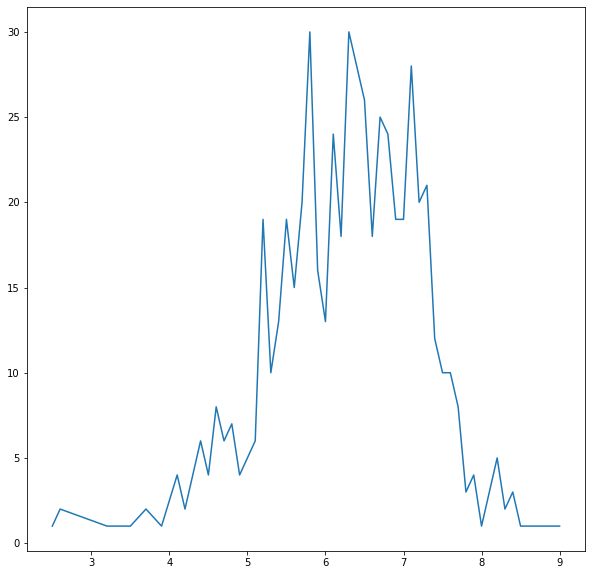

In [ ]:
freq = pd.Series(dados["IMDB Score"].value_counts()).sort_index()
freq.plot(figsize=(10, 10))

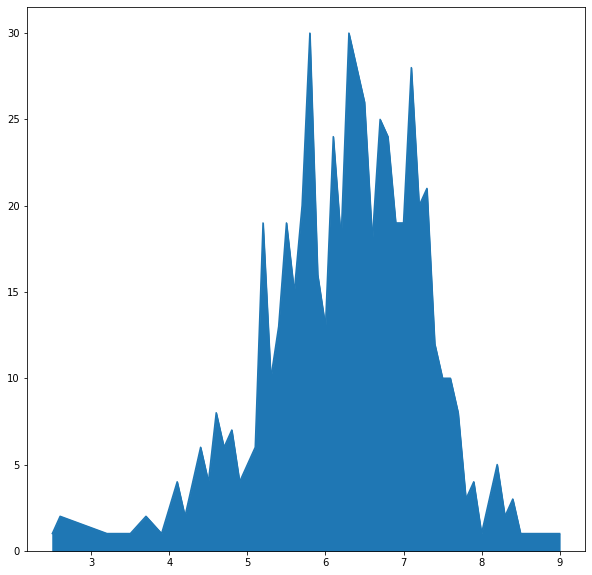

In [ ]:
freq = pd.Series(dados["IMDB Score"].value_counts()).sort_index()
freq.plot.area(figsize=(10, 10))

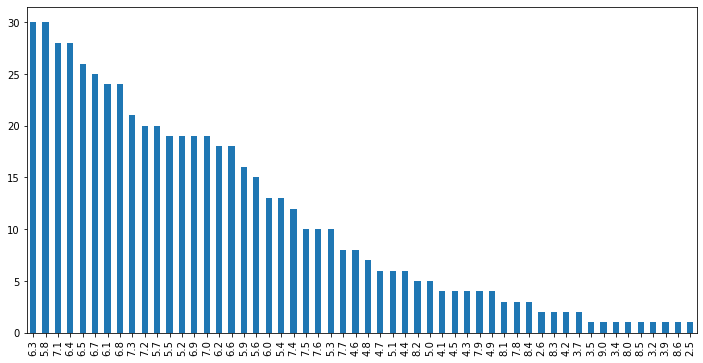

In [ ]:
freq = pd.Series(dados["IMDB Score"].value_counts())
freq.plot.bar(figsize=(12, 6));

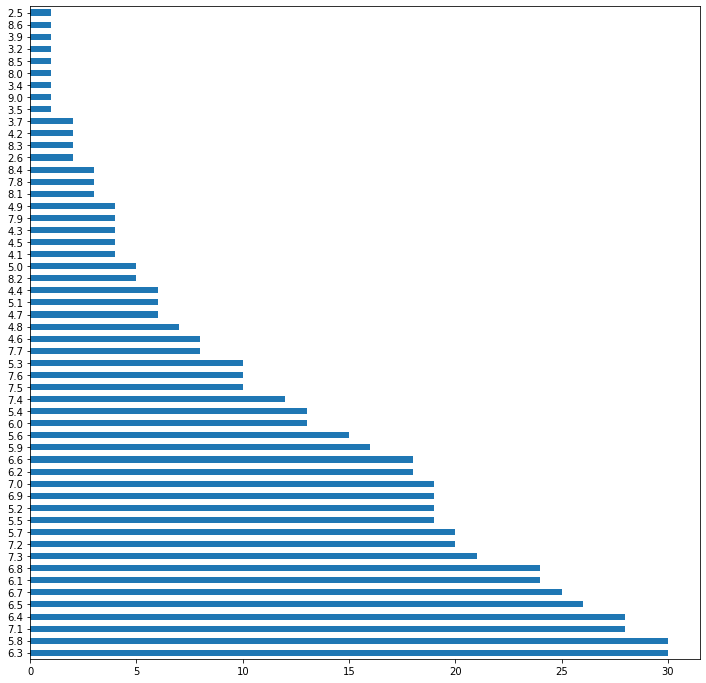

In [ ]:
freq = pd.Series(dados["IMDB Score"].value_counts())
freq.plot.barh(figsize=(12, 12));

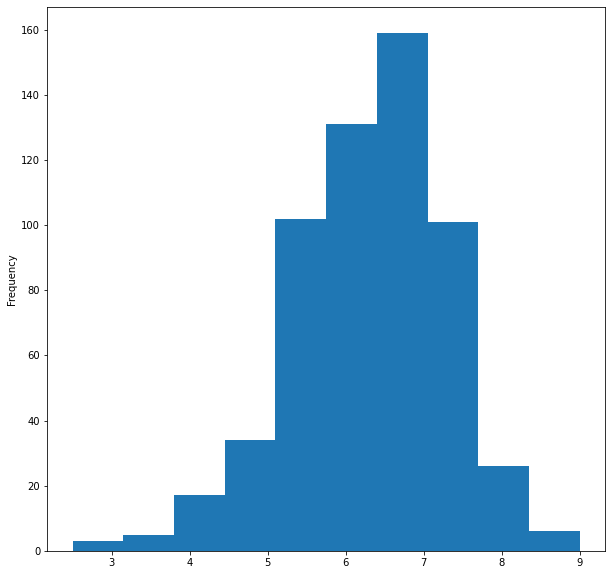

In [ ]:
# Histograma

freq = pd.Series(dados["IMDB Score"])
freq.plot.hist(figsize=(10, 10))

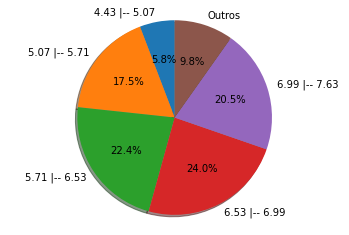

In [ ]:
#Gráfico de Pizza
nomes = "4.43 |-- 5.07","5.07 |-- 5.71","5.71 |-- 6.53","6.53 |-- 6.99","6.99 |-- 7.63","Outros"
tamanhos = [5.8,17.5,22.4,24,20.5,9.8]
explode = (0,0,0,0,0,0)
fig1, ax1 = plt.subplots()
ax1.pie(tamanhos, explode=explode, labels=nomes, autopct='%1.1f%%',
      shadow=True, startangle=90)
ax1.axis('equal')
plt.show()